# LTRM Water Quality Variable Analysis

This script is meant to accompany the 'LTRM simplicial complex.ipynb' and performs the statistical analysis for the water quality variables. It will upload a pickle file with the X data and the simplicial complex that was created in 'LTRM simplical complex.ipynb'.

## Load libraries

In [2]:
import kmapper as km
from kmapper.plotlyviz import *
import pandas as pd
import numpy as np

import sklearn
#from sklearn import ensemble
# DBSCAN from sklearn for clustering algorithms
from sklearn.cluster import DBSCAN
# PCA from sklearn for projection/lens creation
from sklearn.decomposition import PCA
# from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# scipy for interpolation
# import scipy 
# from scipy.interpolate import *
# import hdbscan
import pickle as pk
import json as js
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

# Plotly and Dash
import plotly.graph_objs as go
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
from ipywidgets import (HBox, VBox)
import dash_html_components as html
import dash_core_components as dcc
import dash
from ipywidgets import interactive, HBox, VBox, widgets, interact
import warnings
warnings.filterwarnings("ignore")

## Upload the data and scomplex from pickle file

In [3]:
# Use this if using a pickle file with the scomplex already created
X = pd.read_csv('LTRM_(273,125).csv')

## Names for all of the columns

In [4]:
continuous_variables = ["WDP","TEMP", "DO", "VEL", "TP", "TN", "SS", "CHLcal"]

# Create the list of color columns for the list of continuouse variables being used
variable_colors = []
for variable in continuous_variables:
    temp = variable
    temp += '_color'
    variable_colors.append(temp)

# Create the list of color columns for the list of the unscaled columns
unscaled_variables = []
for variable in continuous_variables:
    temp = variable
    temp += '_unscaled'
    unscaled_variables.append(temp)

pool_names = ['Unexploded Ordinance Area - Pool 13',
              'Bellevue, IA',
              'Brighton, IL',
              'Havana, IL',
              'Jackson, MO',
              'Lake City, MN',
              'Onalaska, WI']

decade_names = ['1993-2000', '1898-2004', '2001-2013', '2010-2016', '2014-2020']

stratum_names = ['Backwater area contiguous to the main channel',
                'Impounded',
                'Isolated',
                'Lake Pepin or Swan Lake',
                'Main channel',
                'Side channel']

state_names = ['State 1', 'State 2', 'State 3', 'State 4', 'State 5']

# Boxplots

In [5]:
# Make different dataframes for the observations in each state - use df if using pickle file
# May need to add more depending on how many states there are
state1 = X[X['State 1'] == 1] 
state2 = X[X['State 2'] == 1] 
state3 = X[X['State 3'] == 1] 
state4 = X[X['State 4'] == 1]
state5 = X[X['State 5'] == 1]

## Boxplots

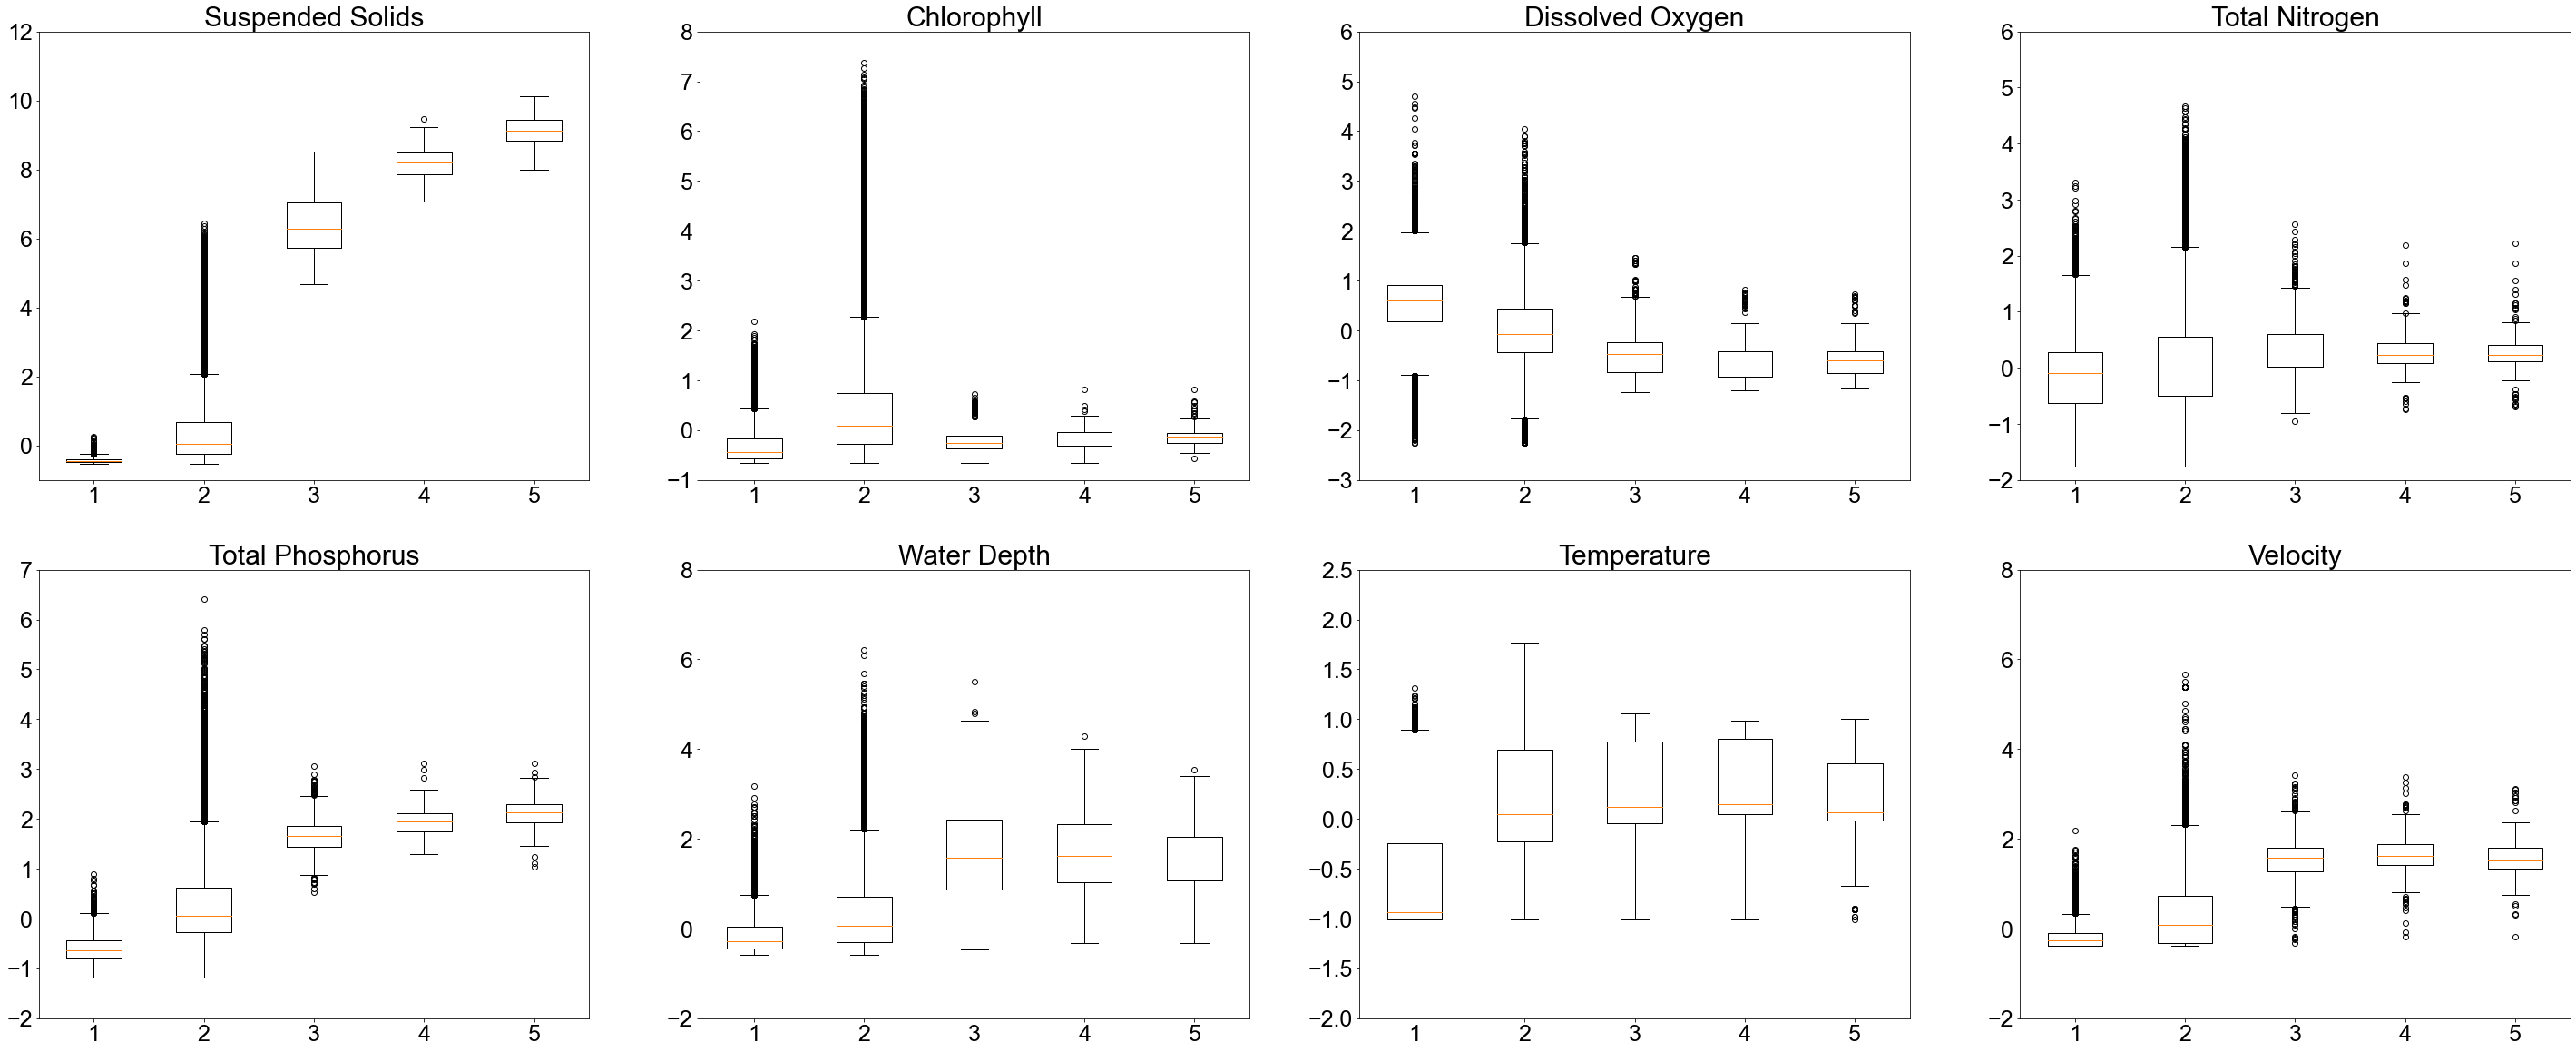

In [6]:
# Scaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax1, ax2, ax3, ax4), 
      (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (50, 20))
          

bp1 = ax1.boxplot([state1['SS'], state2['SS'], state3['SS'], state4['SS'], state5['SS']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax1.set_title('Suspended Solids')   
ax1.set_ylim(-1, 12) 

bp2 = ax2.boxplot([state1['CHLcal'], state2['CHLcal'], state3['CHLcal'], state4['CHLcal'], state5['CHLcal']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Chlorophyll')   
ax2.set_ylim(-1, 8) 

bp3 = ax3.boxplot([state1['DO'], state2['DO'], state3['DO'], state4['DO'], state5['DO']],
                    vert = True,
                    labels = ['1', '2','3','4','5'])
ax3.set_title('Dissolved Oxygen')   
ax3.set_ylim(-3, 6) 

bp4 = ax4.boxplot([state1['TN'], state2['TN'], state3['TN'], state4['TN'], state5['TN']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax4.set_title('Total Nitrogen')   
ax4.set_ylim(-2, 6)               

bp5 = ax5.boxplot([state1['TP'], state2['TP'], state3['TP'], state4['TP'], state5['TP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax5.set_title('Total Phosphorus')   
ax5.set_ylim(-2, 7) 

bp6 = ax6.boxplot([state1['WDP'], state2['WDP'],state3['WDP'], state4['WDP'], state5['WDP']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax6.set_title('Water Depth')   
ax6.set_ylim(-2, 8) 

bp7 = ax7.boxplot([state1['TEMP'], state2['TEMP'], state3['TEMP'], state4['TEMP'], state5['TEMP']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax7.set_title('Temperature')   
ax7.set_ylim(-2, 2.5) 

bp8 = ax8.boxplot([state1['VEL'], state2['VEL'], state3['VEL'], state4['VEL'], state5['VEL']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax8.set_title('Velocity')   
ax8.set_ylim(-2, 8) 

plt.savefig('LTRM_boxplots.png')

### Unscaled boxplots

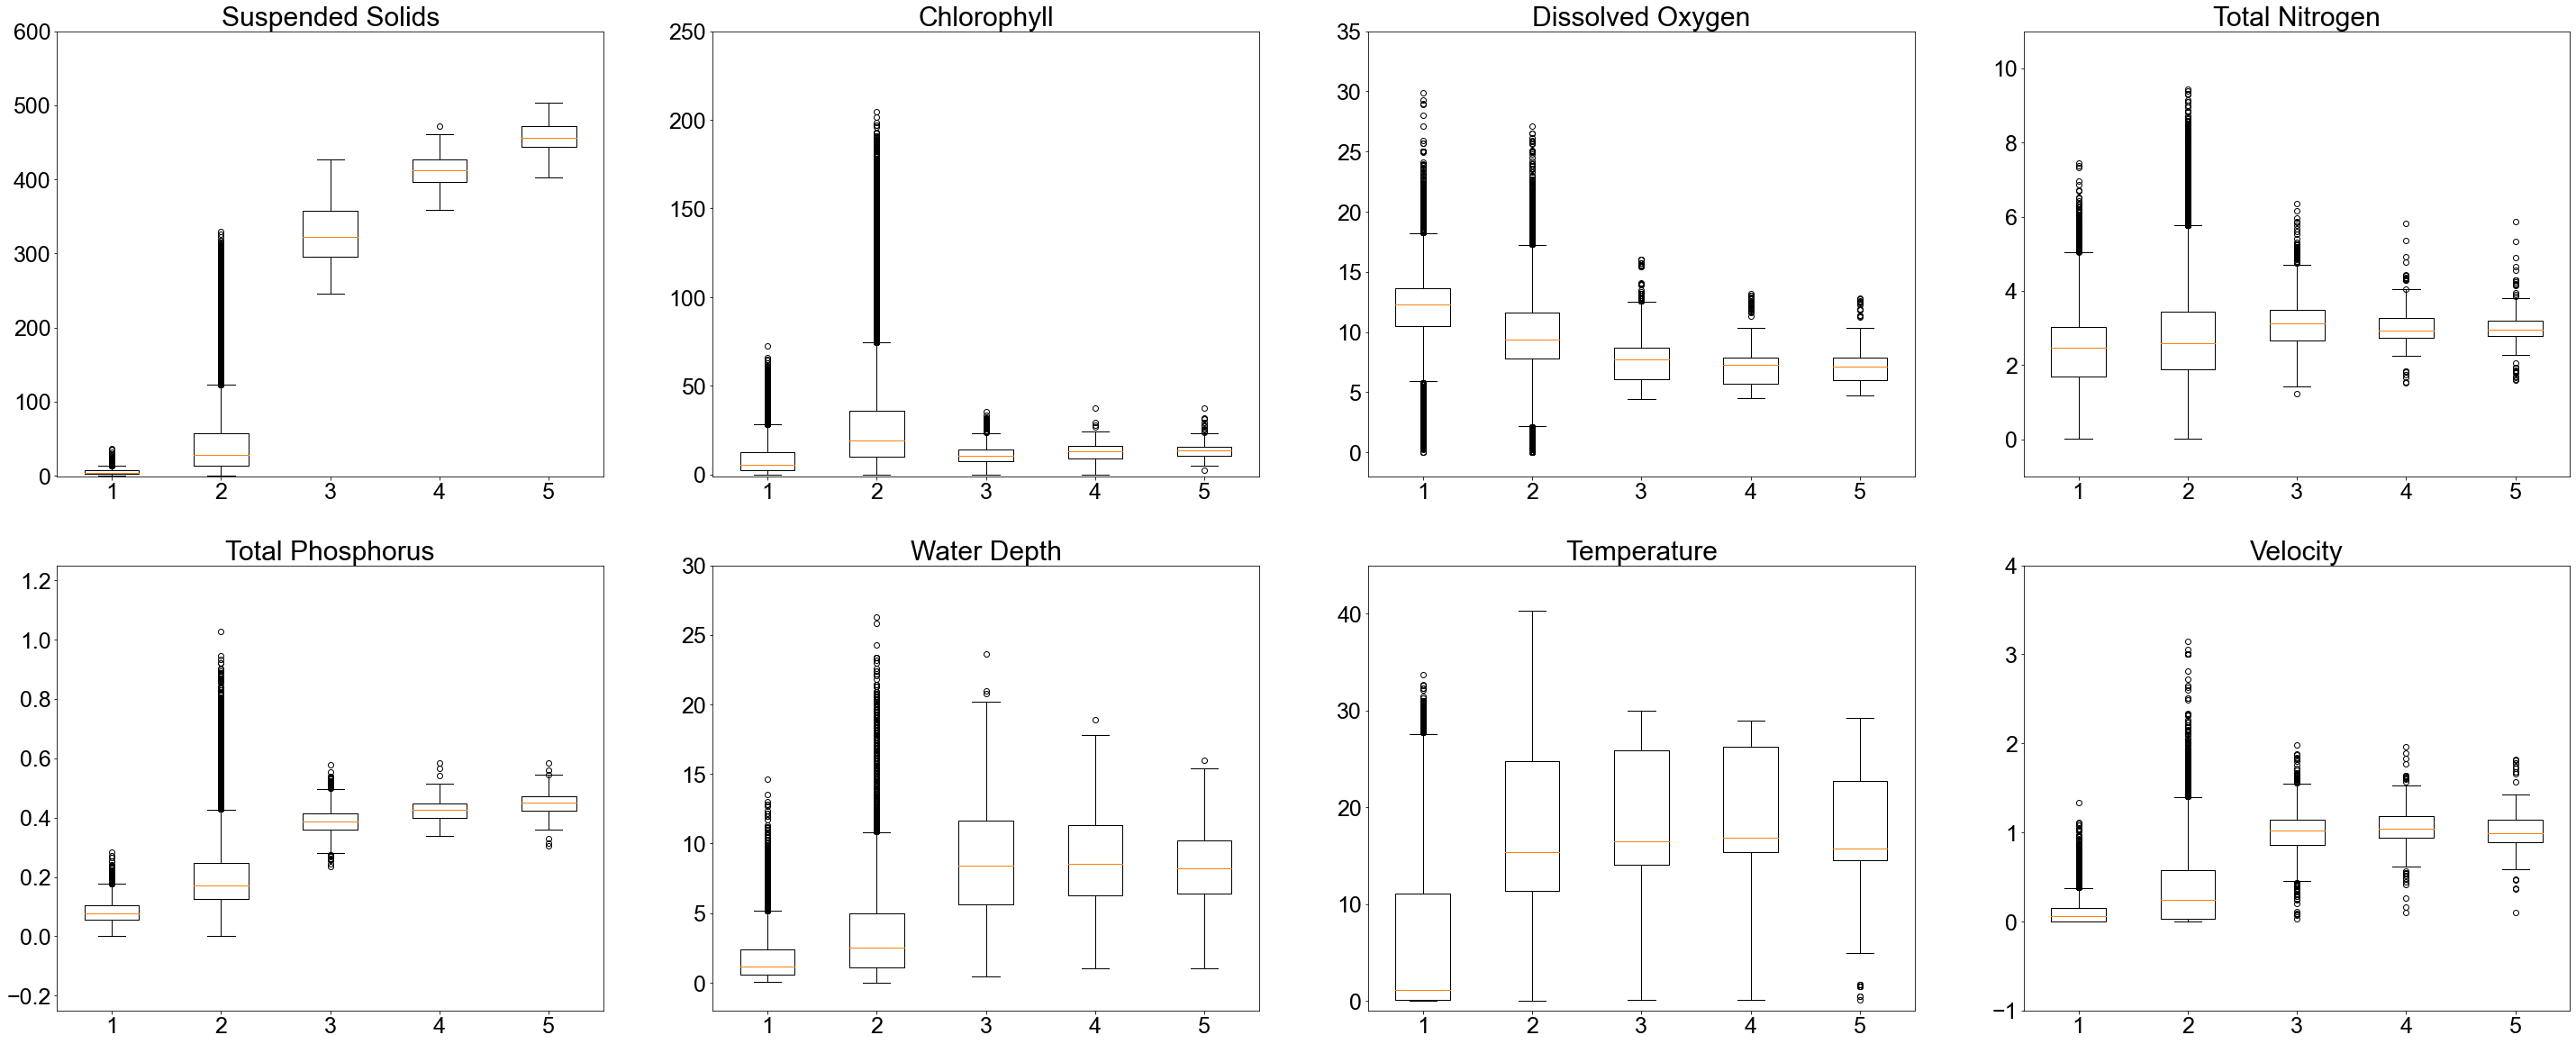

In [7]:
# Scaled boxplots
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams["font.family"] = "arial"
 
fig, ((ax1, ax2, ax3, ax4), 
      (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (50, 20))
          

bp1 = ax1.boxplot([state1['SS_unscaled'], state2['SS_unscaled'], state3['SS_unscaled'], state4['SS_unscaled'], state5['SS_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax1.set_title('Suspended Solids')   
ax1.set_ylim(-1, 600) 

bp2 = ax2.boxplot([state1['CHLcal_unscaled'], state2['CHLcal_unscaled'], state3['CHLcal_unscaled'], state4['CHLcal_unscaled'], 
                  state5['CHLcal_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax2.set_title('Chlorophyll')   
ax2.set_ylim(-1, 250) 

bp3 = ax3.boxplot([state1['DO_unscaled'], state2['DO_unscaled'], state3['DO_unscaled'], state4['DO_unscaled'], state5['DO_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4','5'])
ax3.set_title('Dissolved Oxygen')   
ax3.set_ylim(-2, 35) 

bp4 = ax4.boxplot([state1['TN_unscaled'], state2['TN_unscaled'], state3['TN_unscaled'], state4['TN_unscaled'], state5['TN_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax4.set_title('Total Nitrogen')   
ax4.set_ylim(-1, 11)               

bp5 = ax5.boxplot([state1['TP_unscaled'], state2['TP_unscaled'], state3['TP_unscaled'], state4['TP_unscaled'], state5['TP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax5.set_title('Total Phosphorus')   
ax5.set_ylim(-.25, 1.25) 

bp6 = ax6.boxplot([state1['WDP_unscaled'], state2['WDP_unscaled'],state3['WDP_unscaled'], state4['WDP_unscaled'], state5['WDP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax6.set_title('Water Depth')   
ax6.set_ylim(-2, 30) 

bp7 = ax7.boxplot([state1['TEMP_unscaled'], state2['TEMP_unscaled'], state3['TEMP_unscaled'], state4['TEMP_unscaled'], 
                  state5['TEMP_unscaled']],
                    vert = True,
                    labels = ['1', '2','3', '4', '5'])
ax7.set_title('Temperature')   
ax7.set_ylim(-1, 45) 

bp8 = ax8.boxplot([state1['VEL_unscaled'], state2['VEL_unscaled'], state3['VEL_unscaled'], state4['VEL_unscaled'], 
                  state5['VEL_unscaled']],
                    vert = True,
                    labels = ['1', '2','3','4', '5'])
ax8.set_title('Velocity')   
ax8.set_ylim(-1, 4) 

plt.savefig('LTRM_boxplots_unscaled.png')

### Individual boxplots

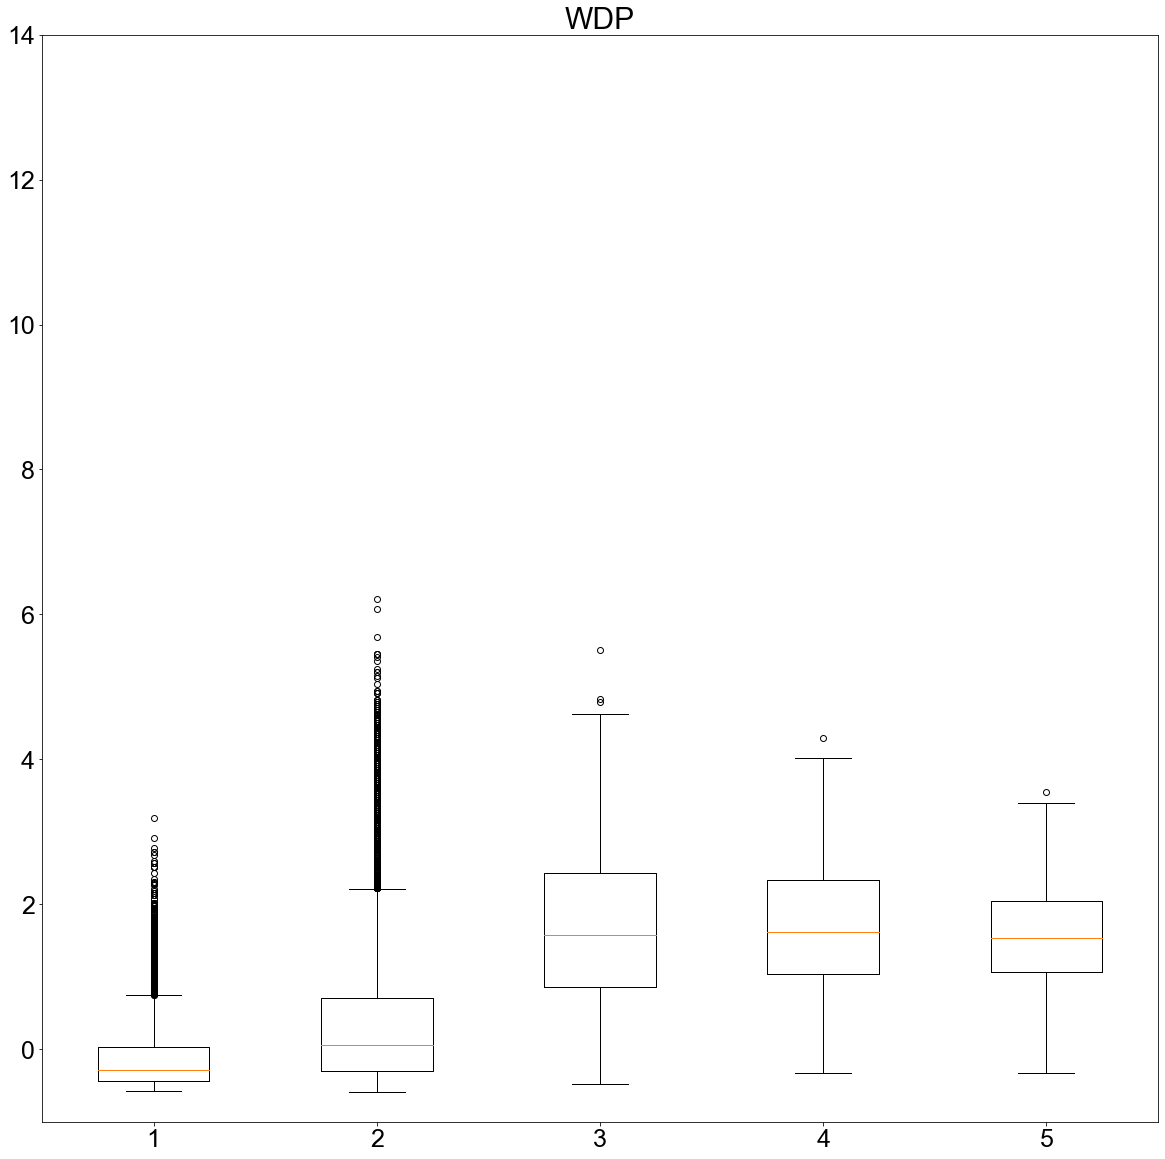

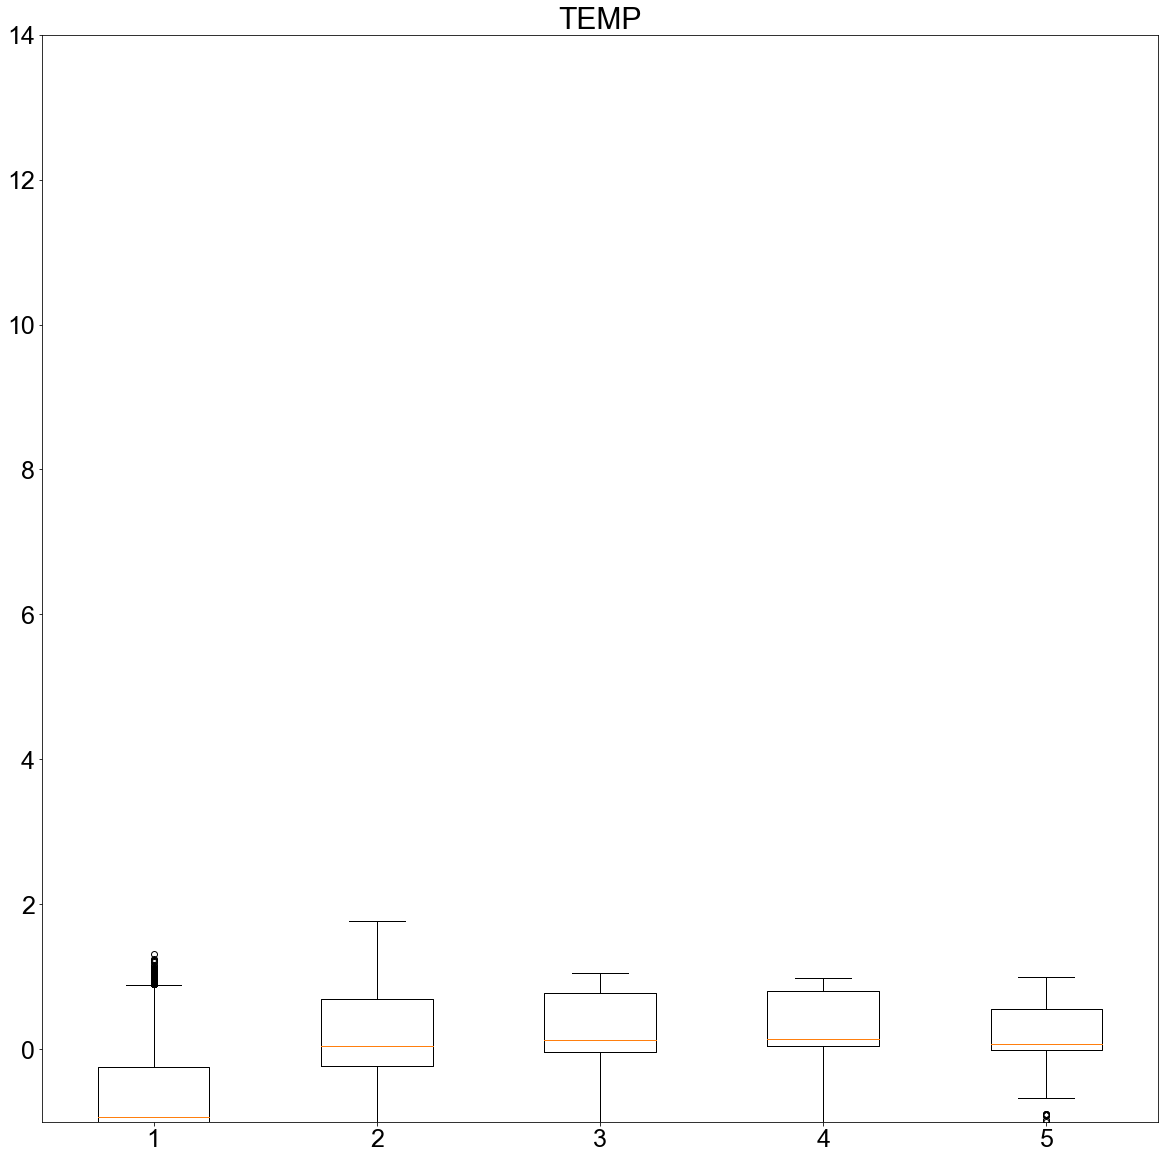

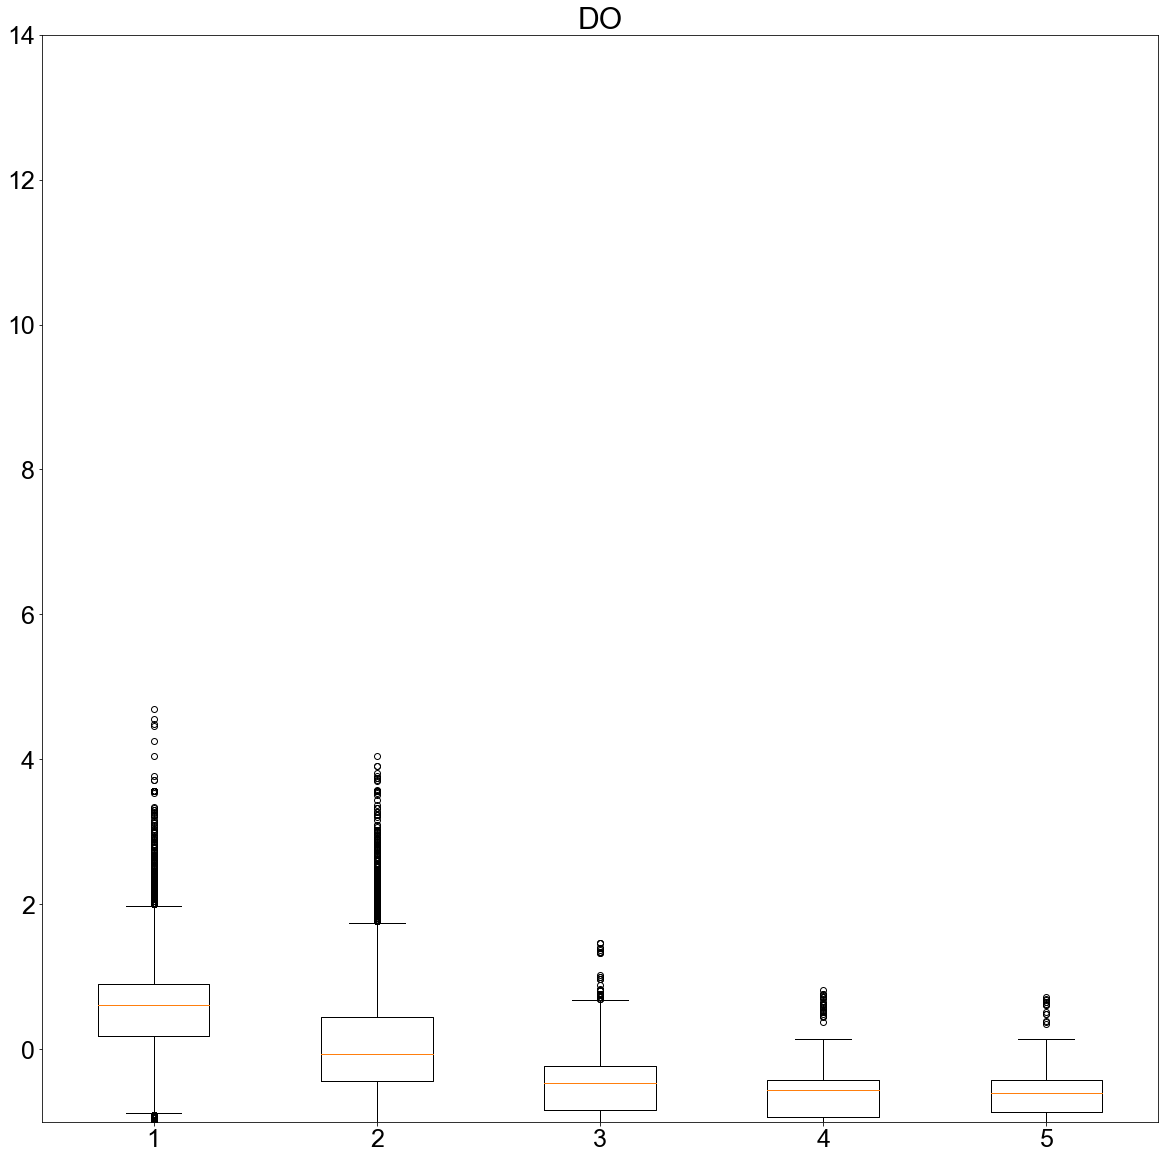

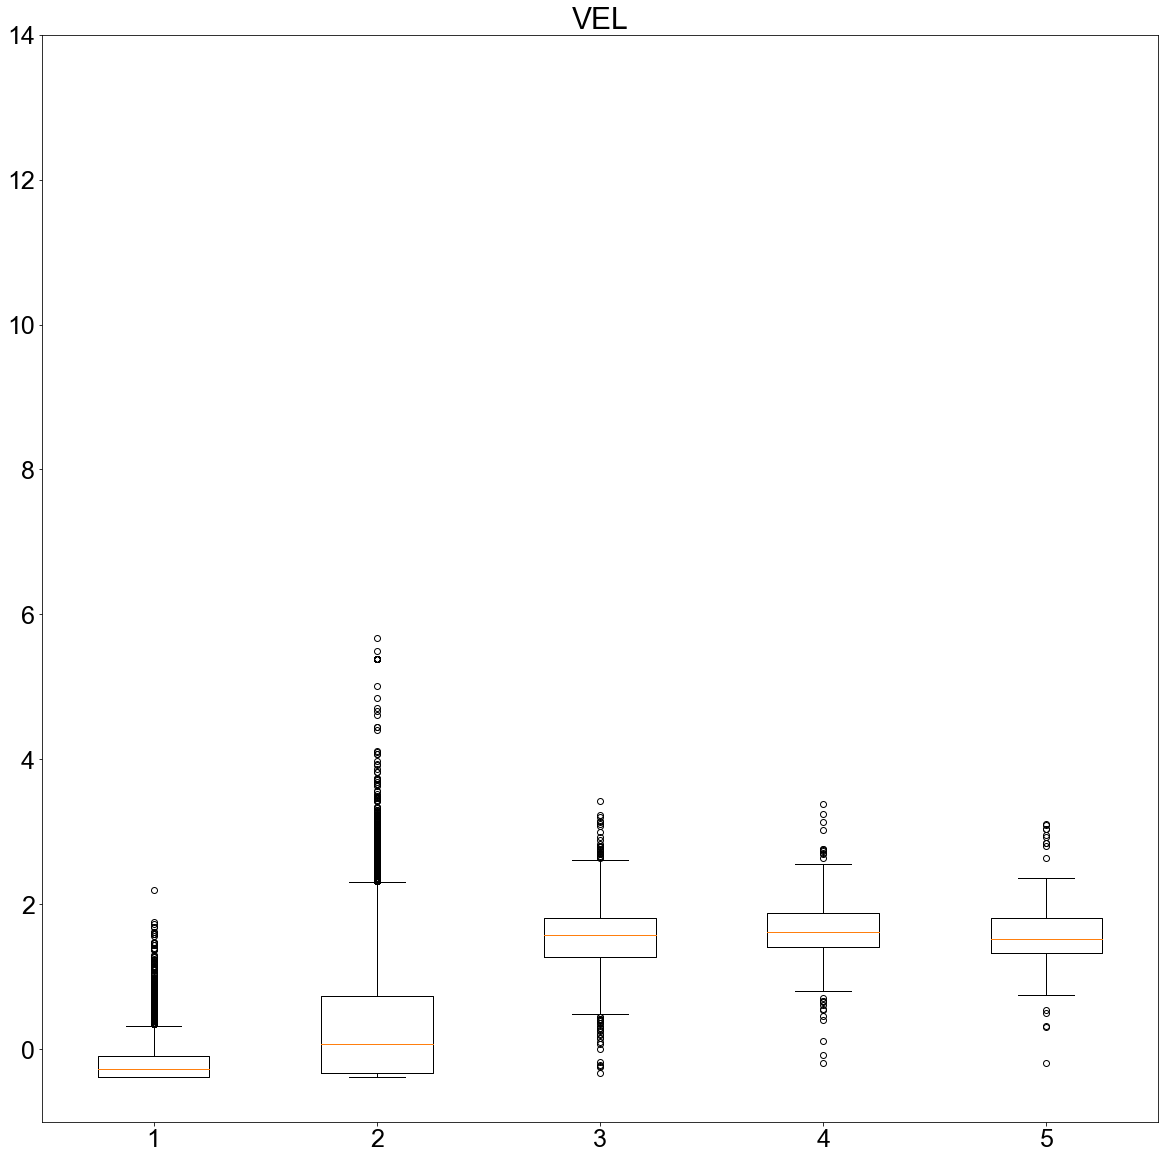

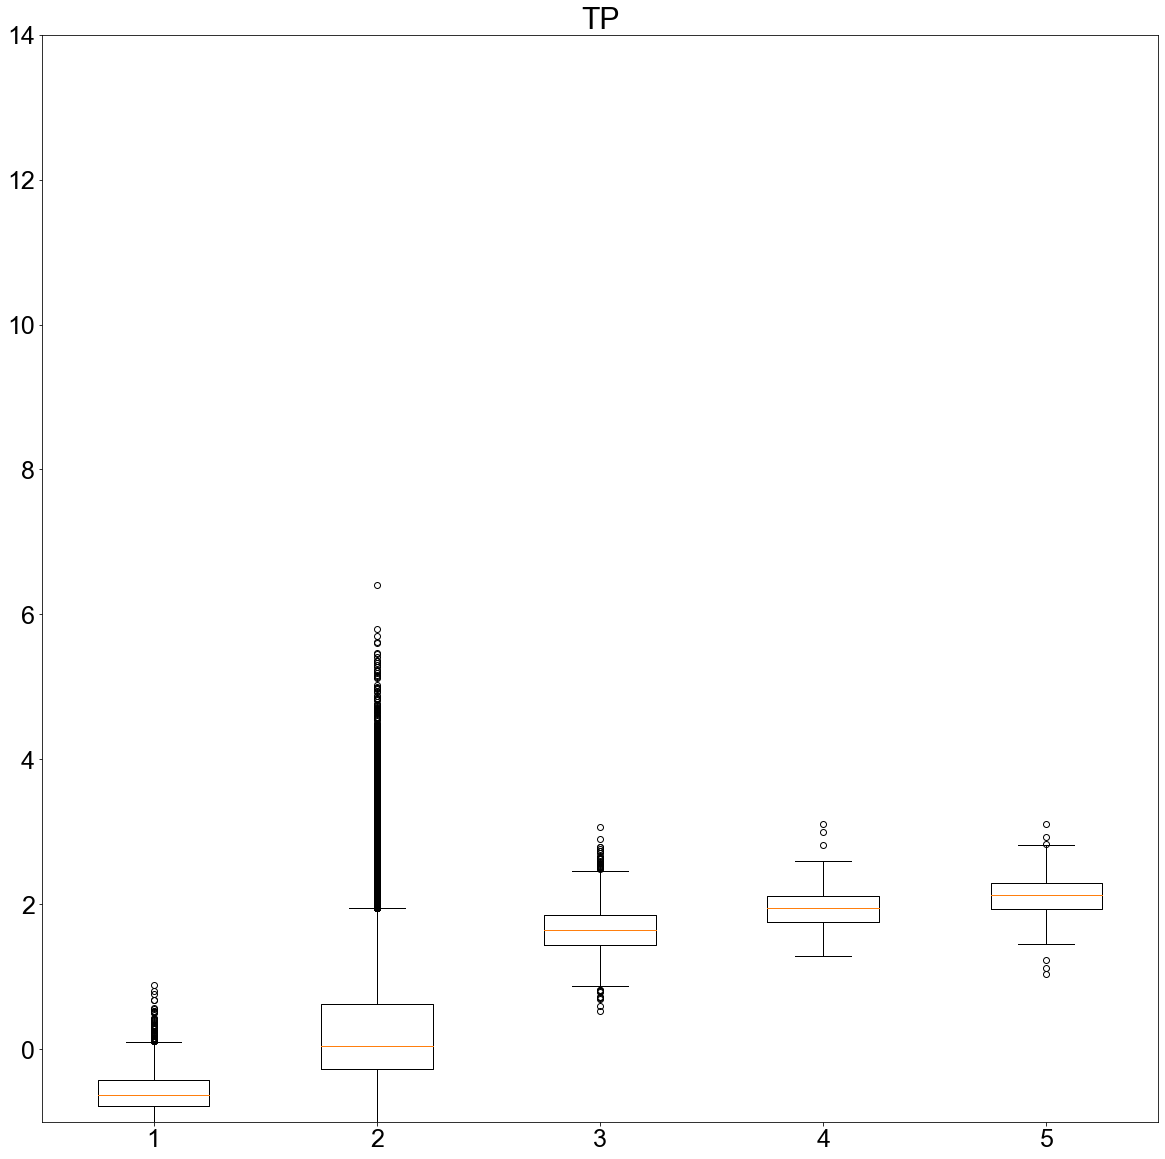

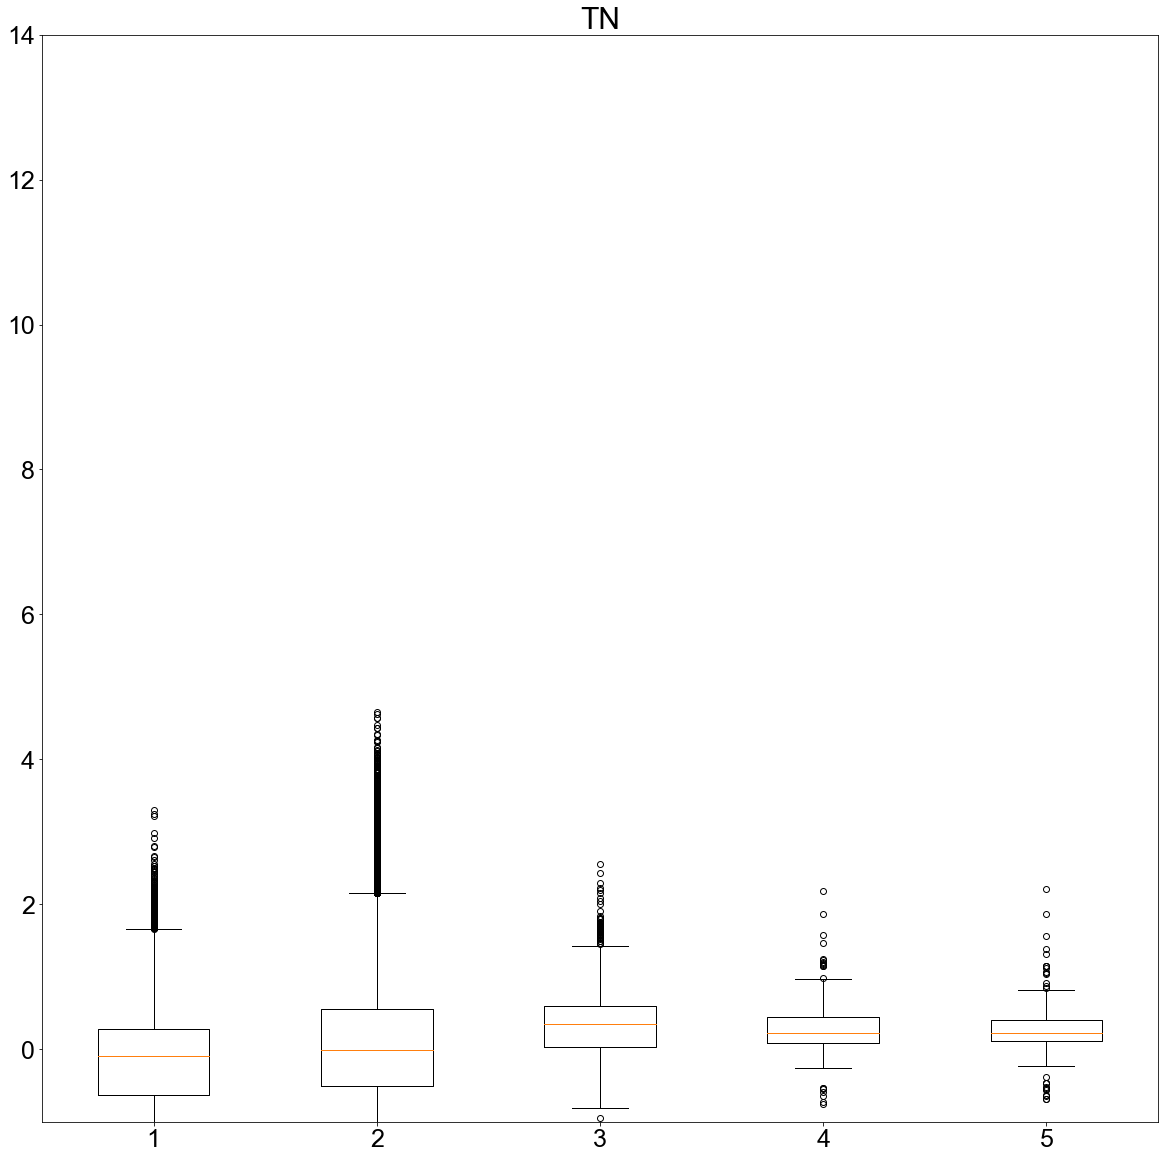

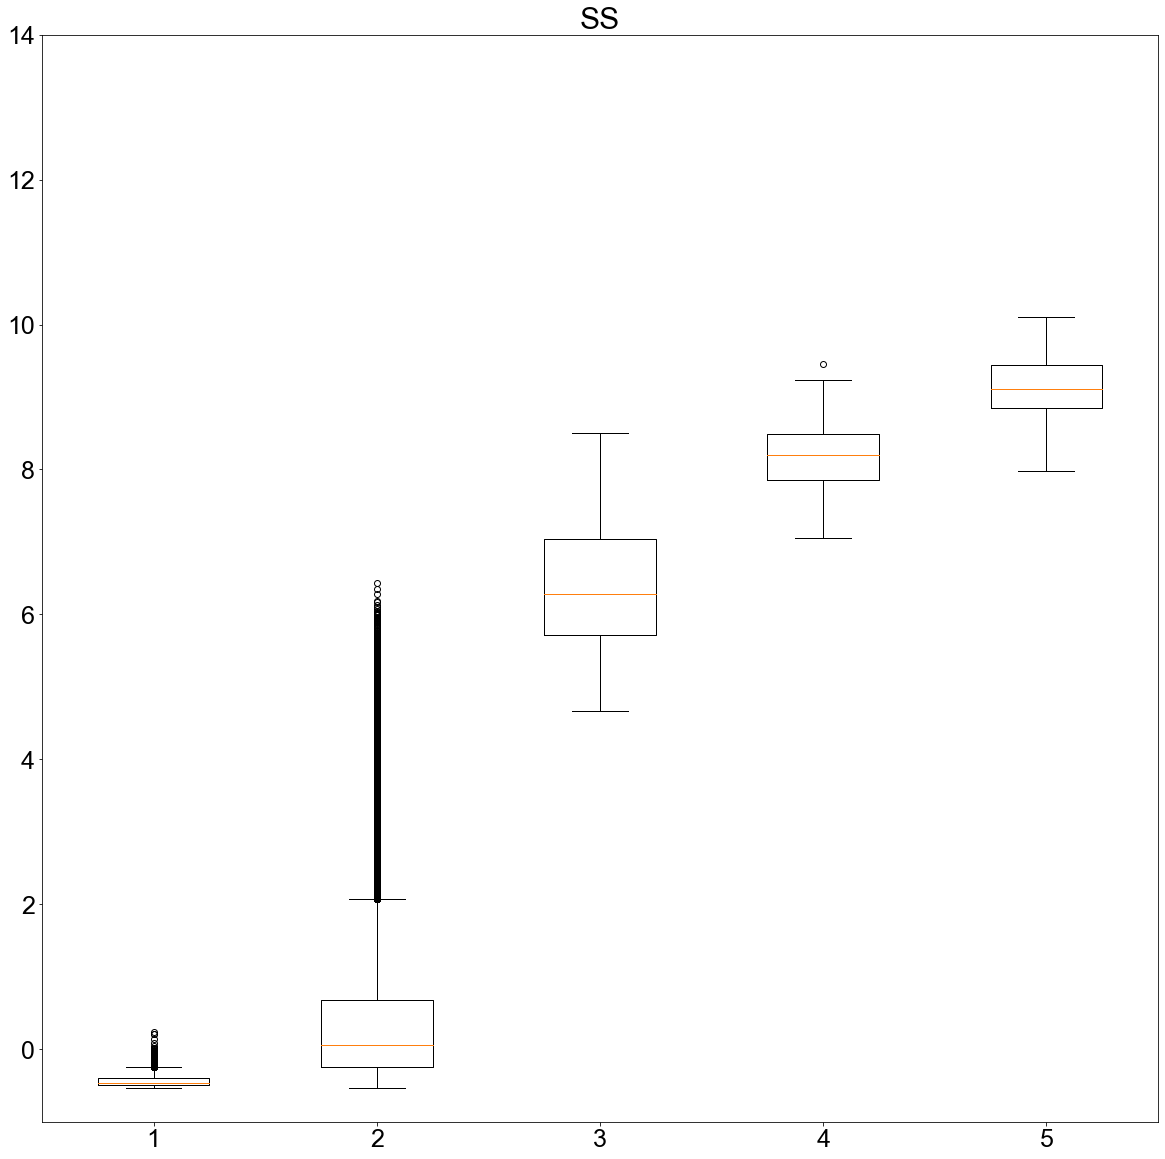

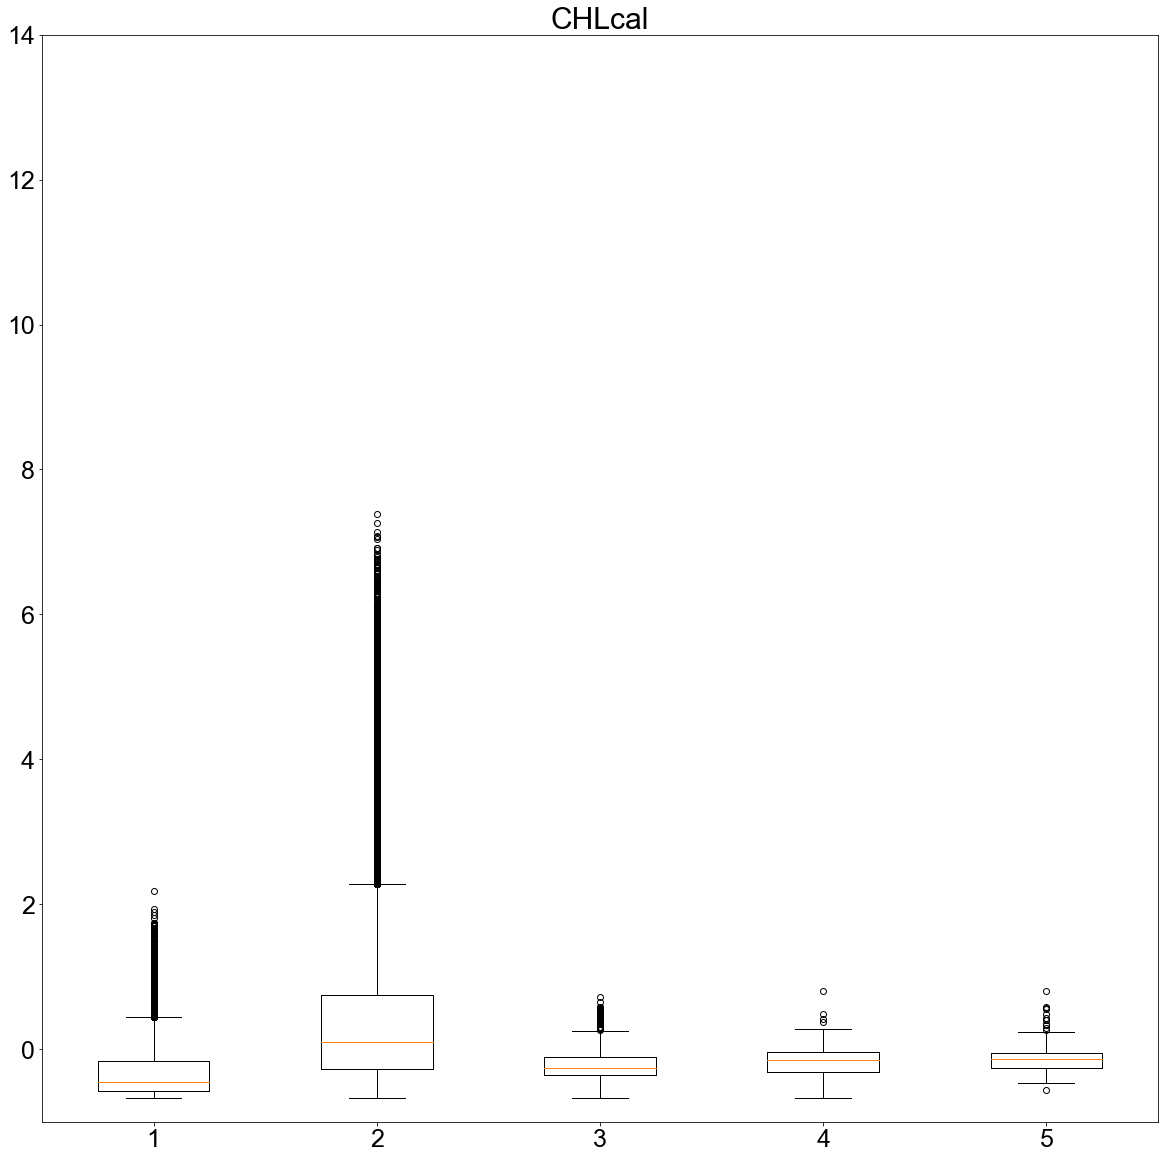

In [8]:
# This prints out one boxplots at a time
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
 
for variable in continuous_variables :
      fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20))
      bp1 = ax1.boxplot([state1[variable], state2[variable], state3[variable], state4[variable], state5[variable]],
                         vert = True,
                         labels = ['1', '2', '3', '4','5'])
      ax1.set_title(variable)
      ax1.set_ylim(-1, 14)
      file = str(variable) + '_boxplot.png'

### Unscaled Individual Boxplots

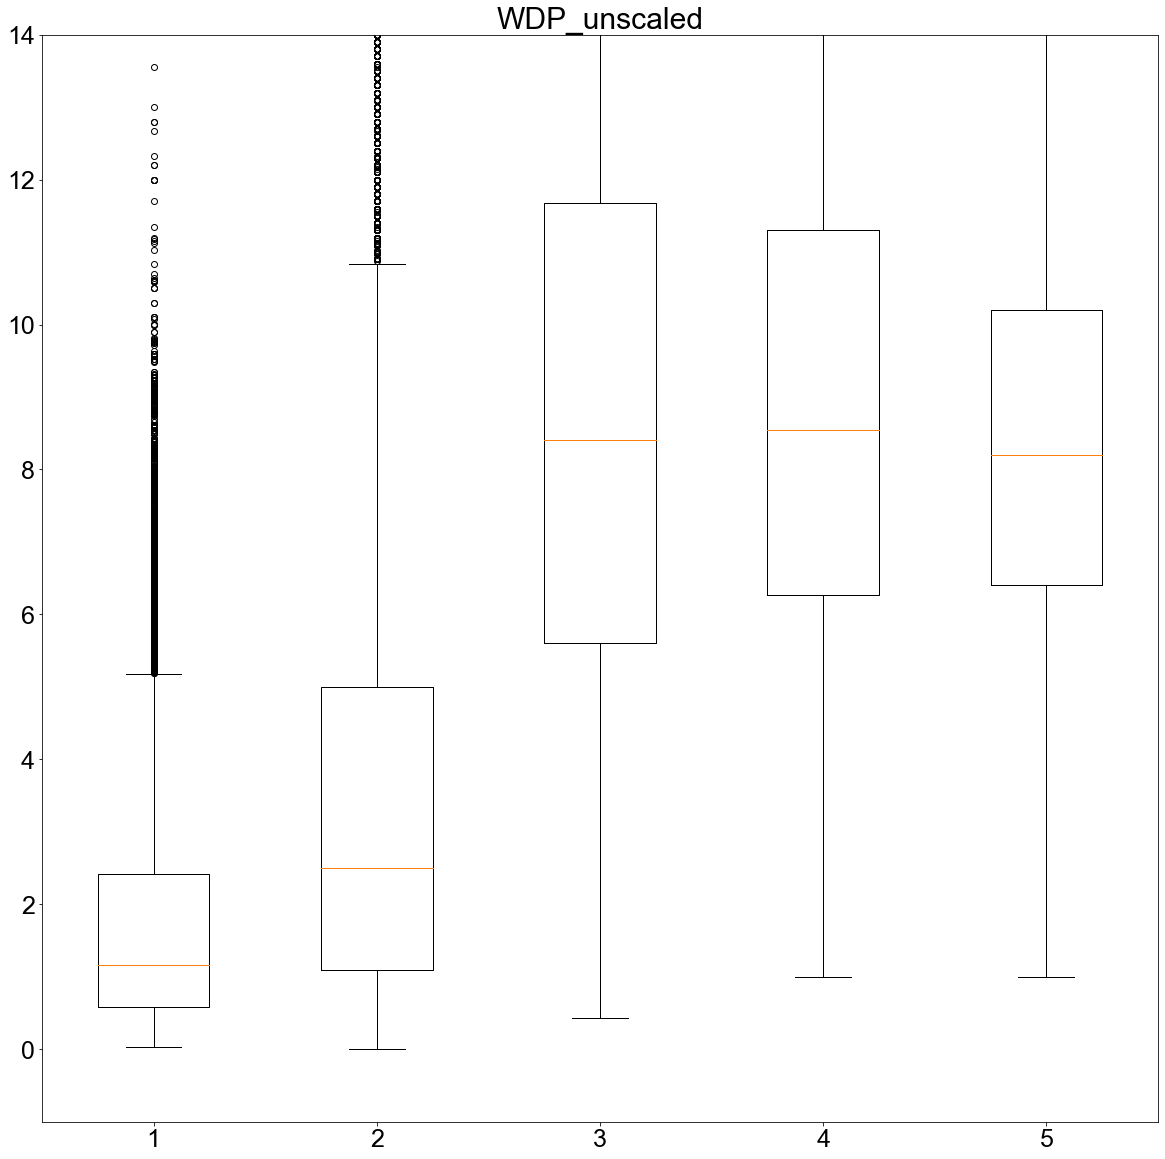

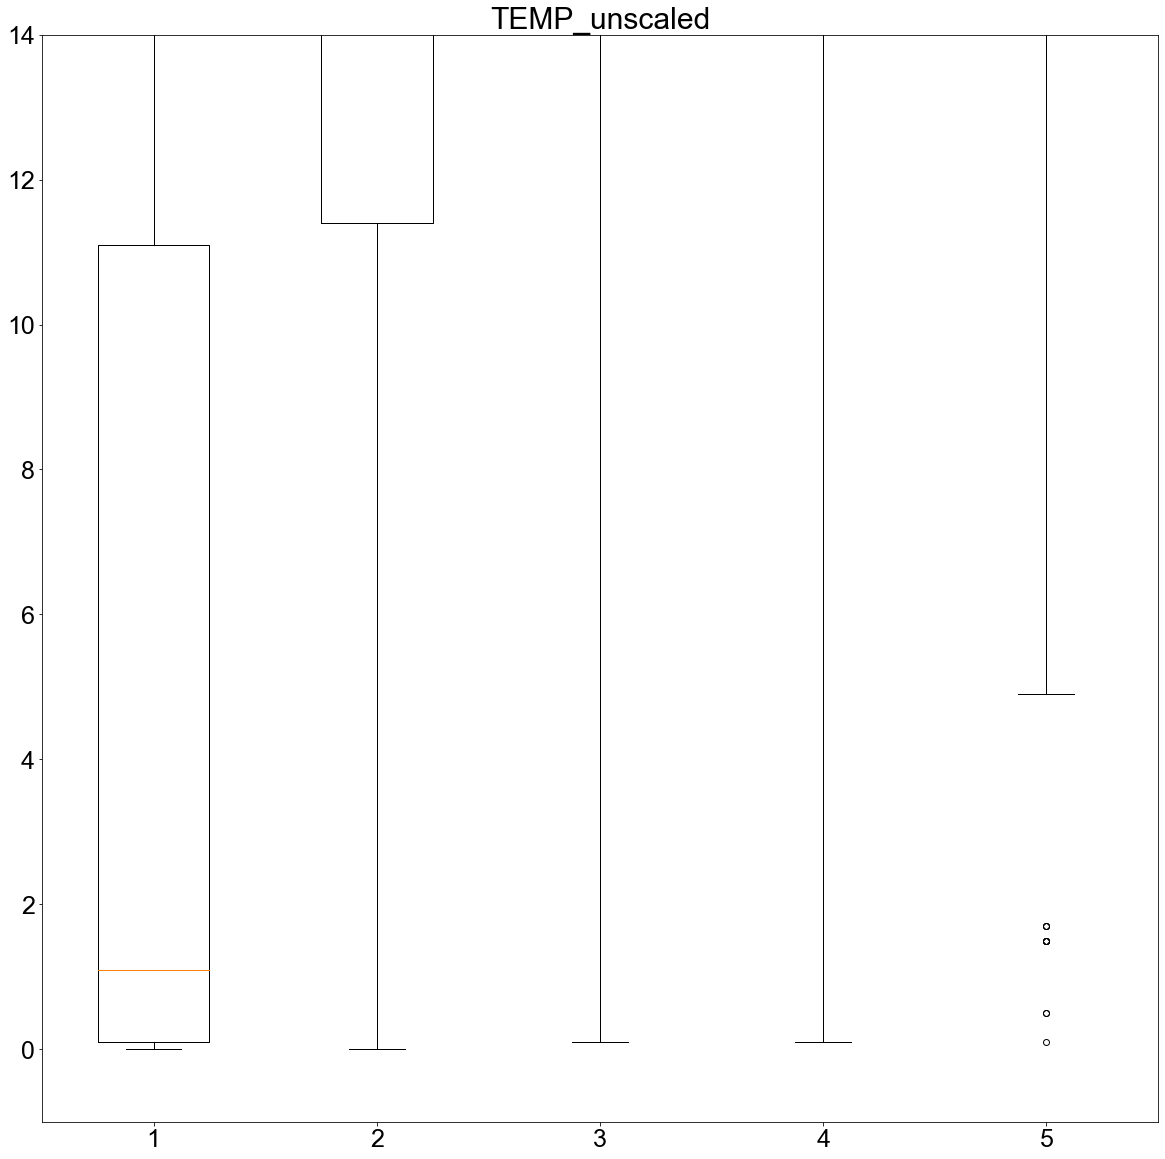

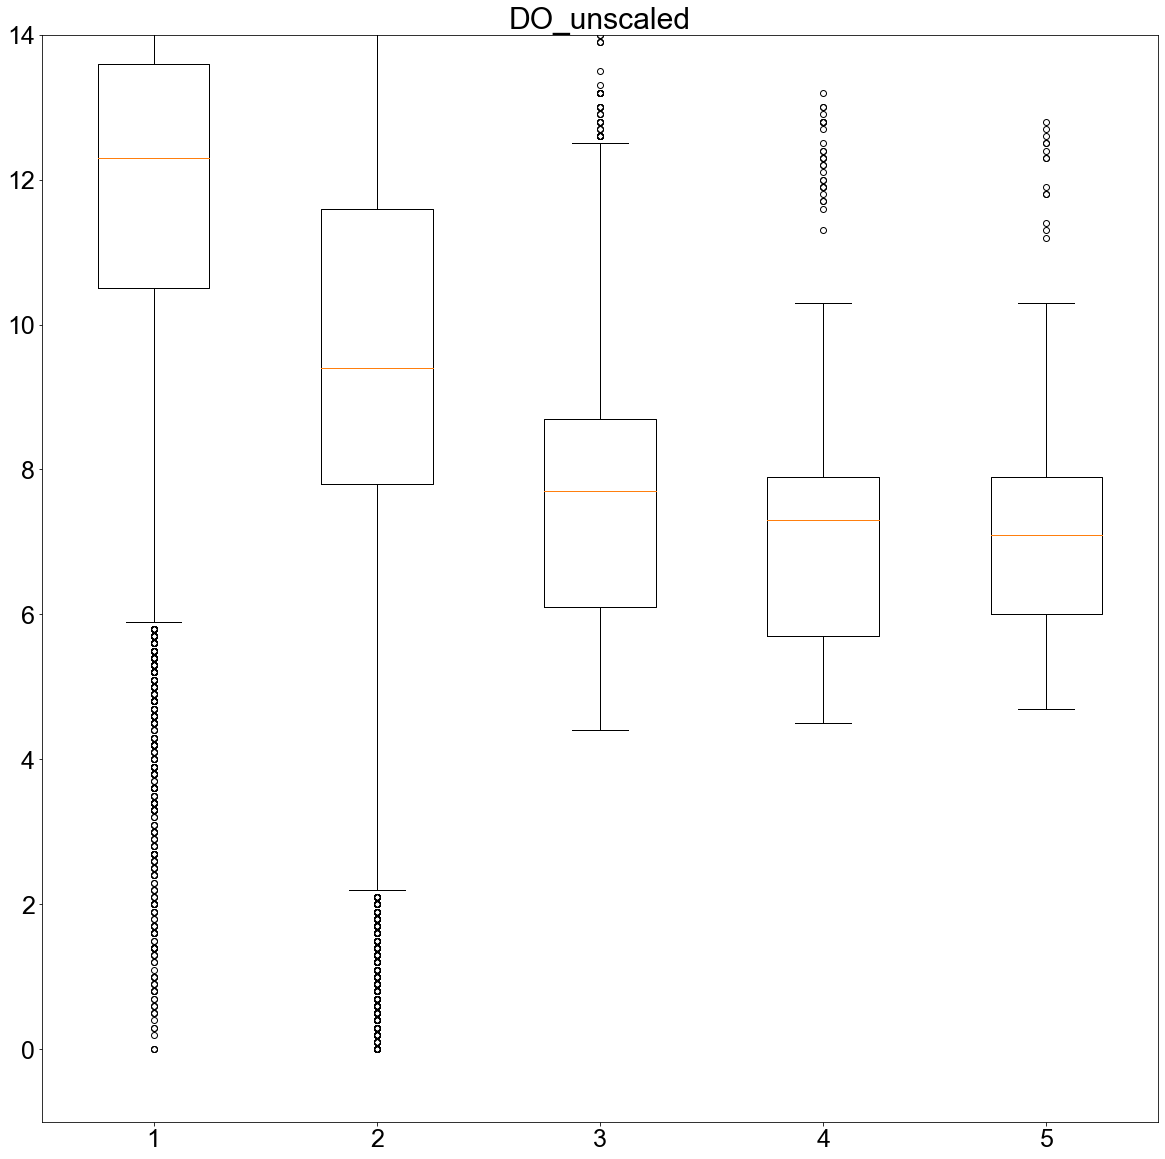

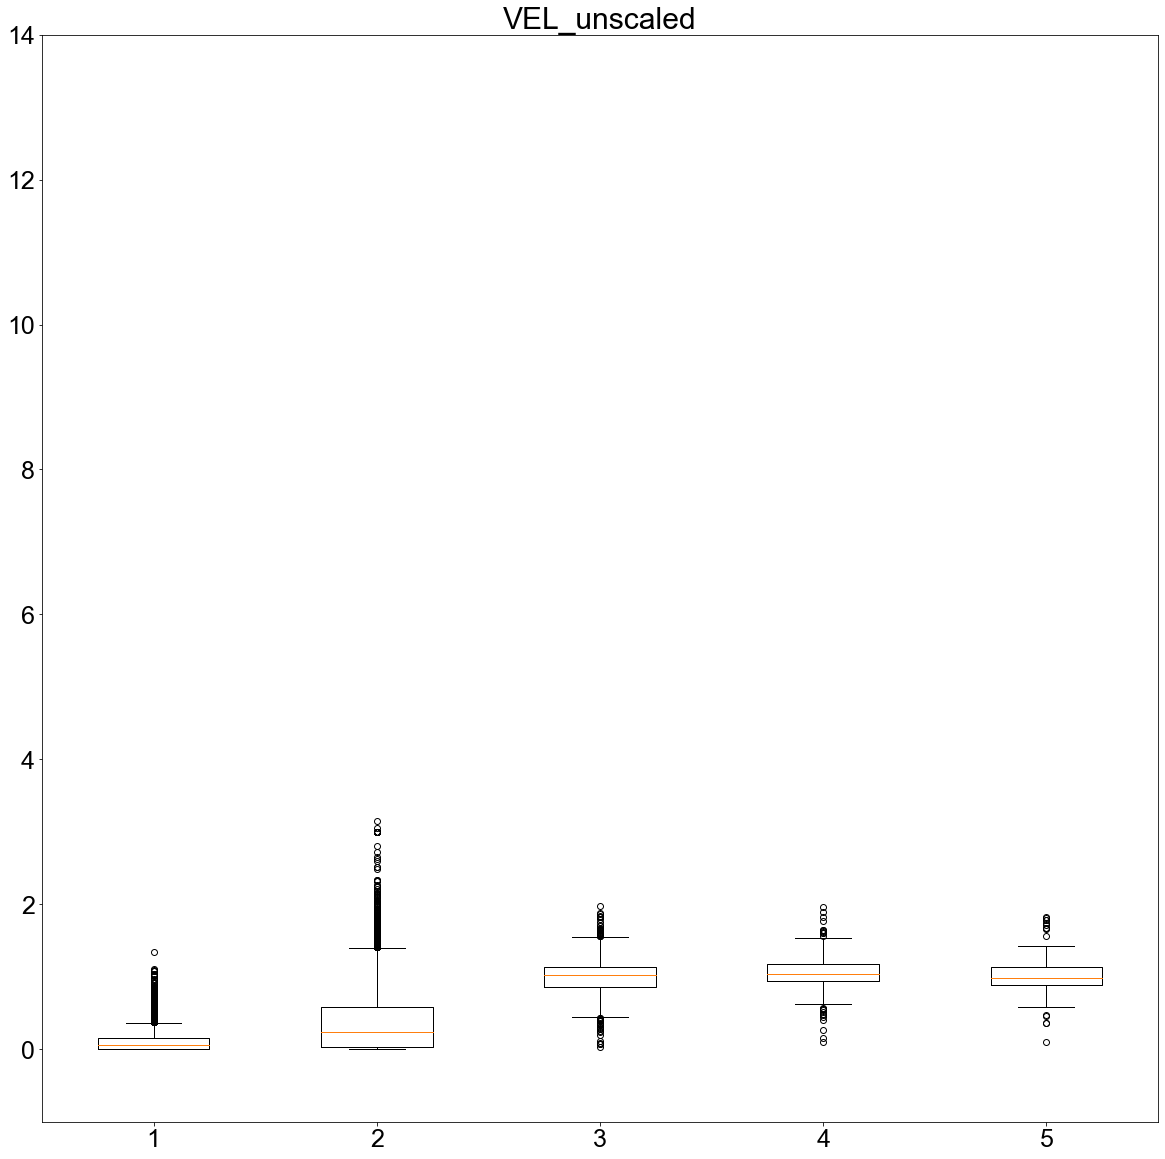

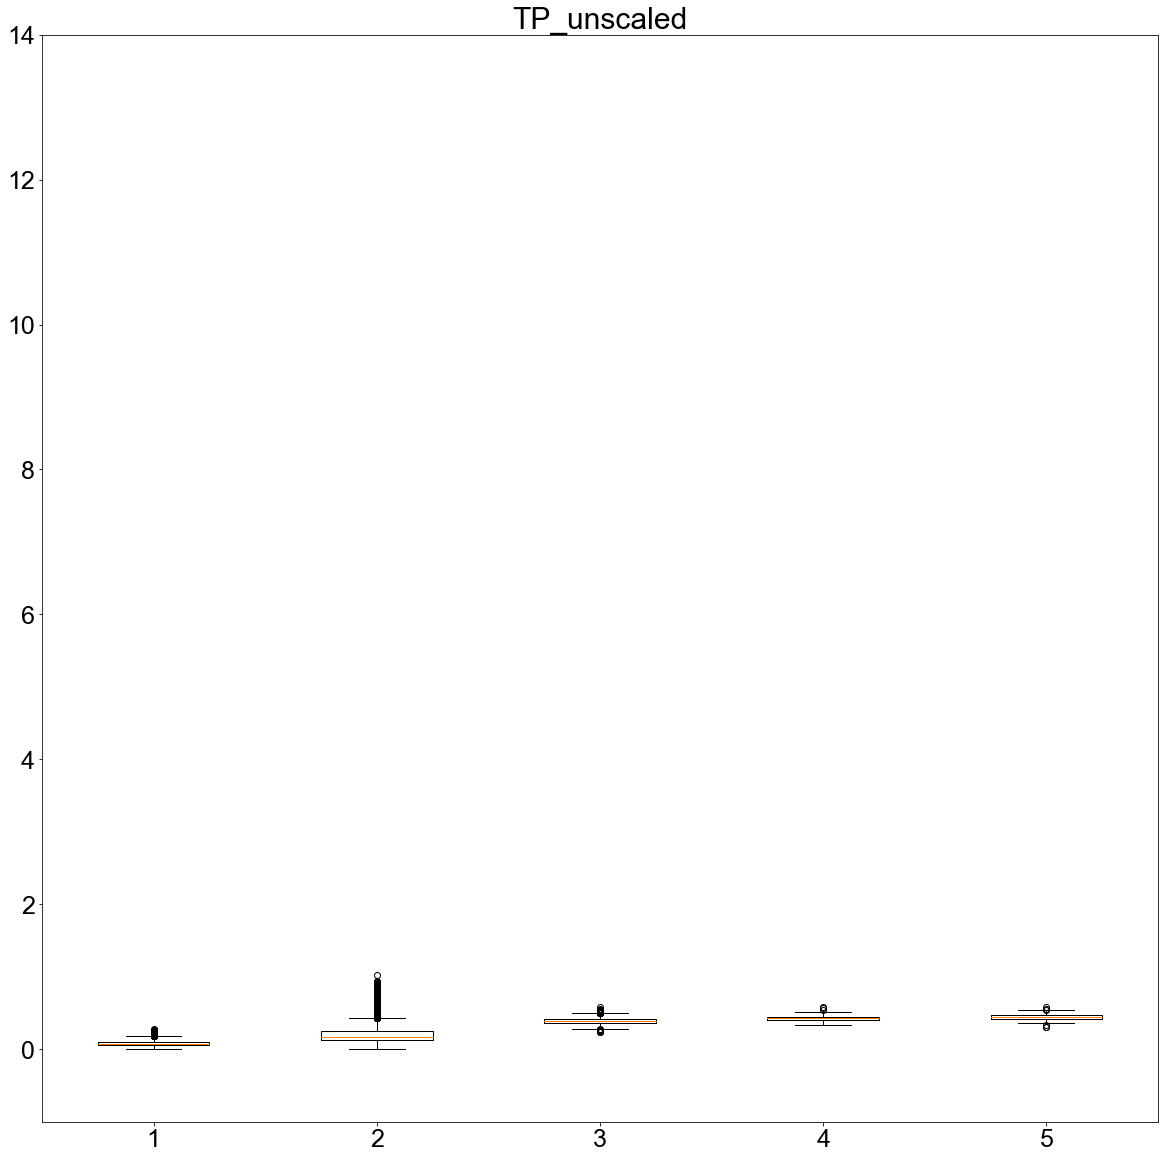

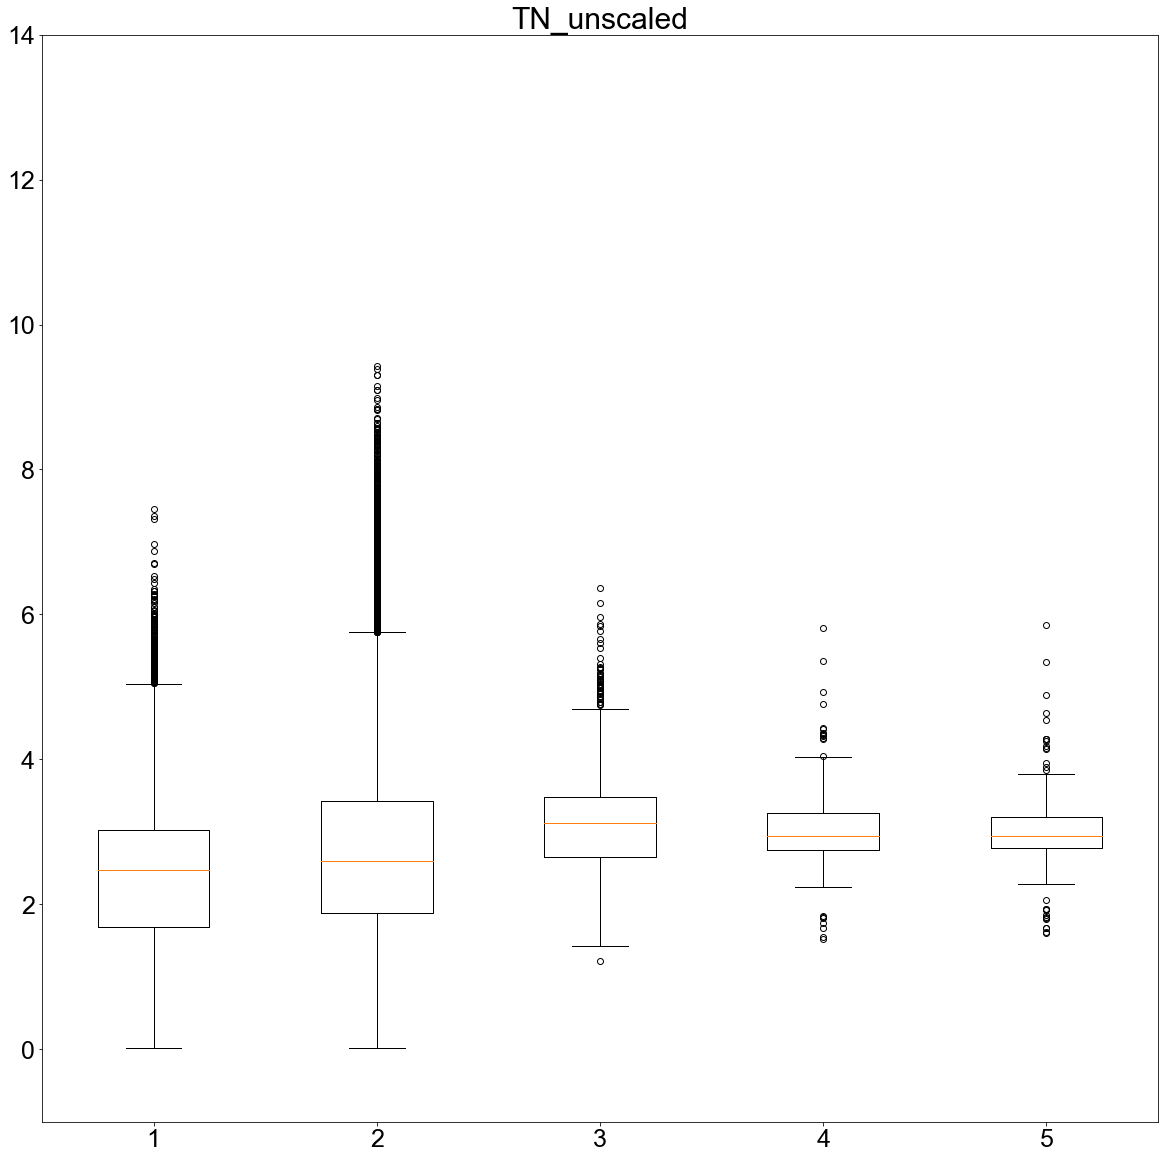

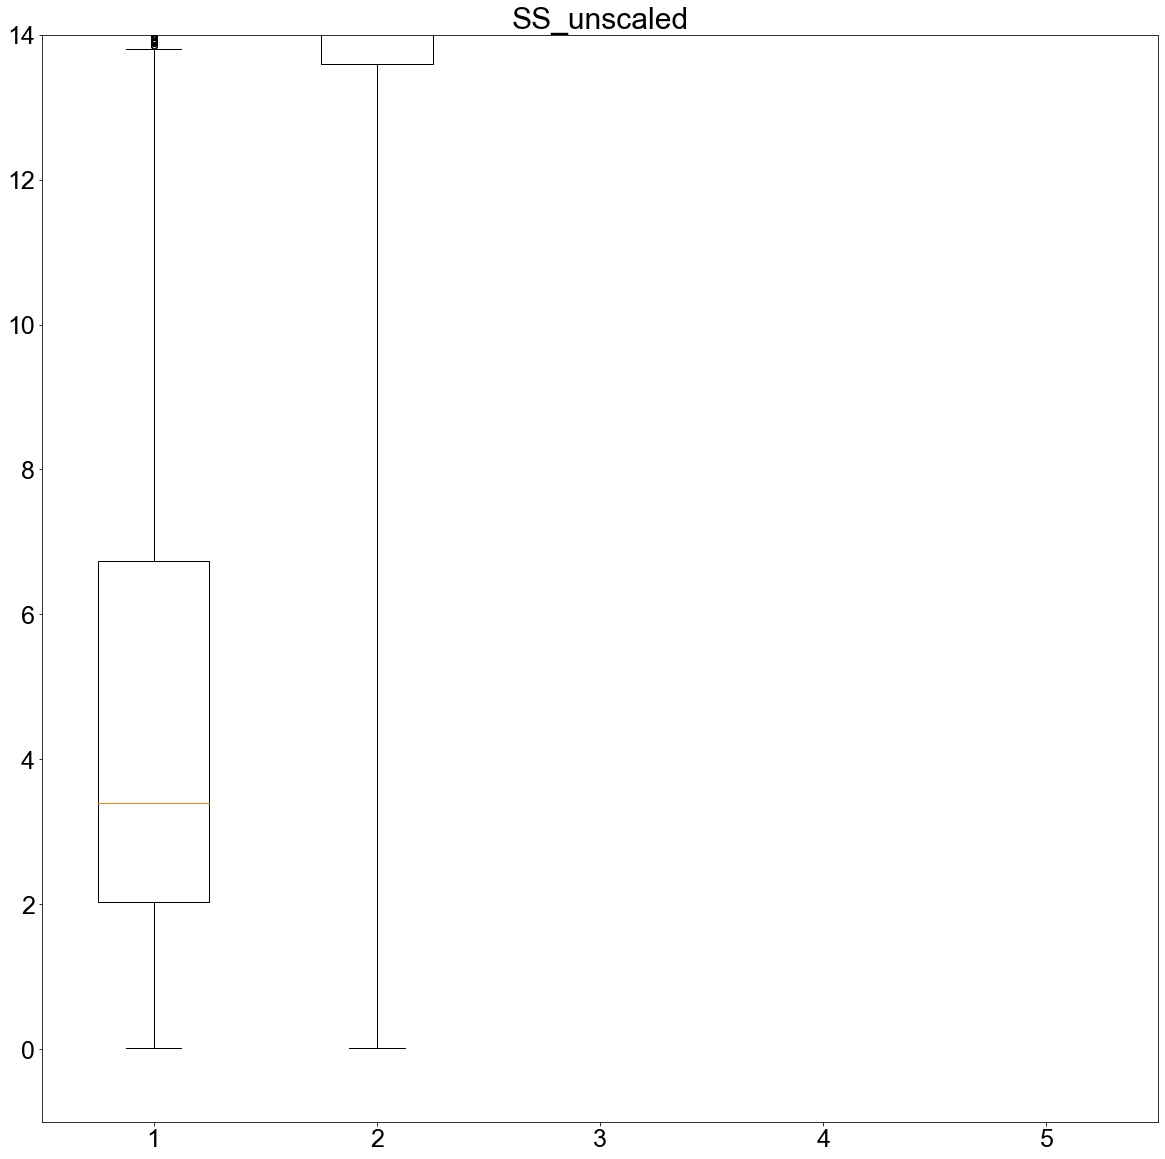

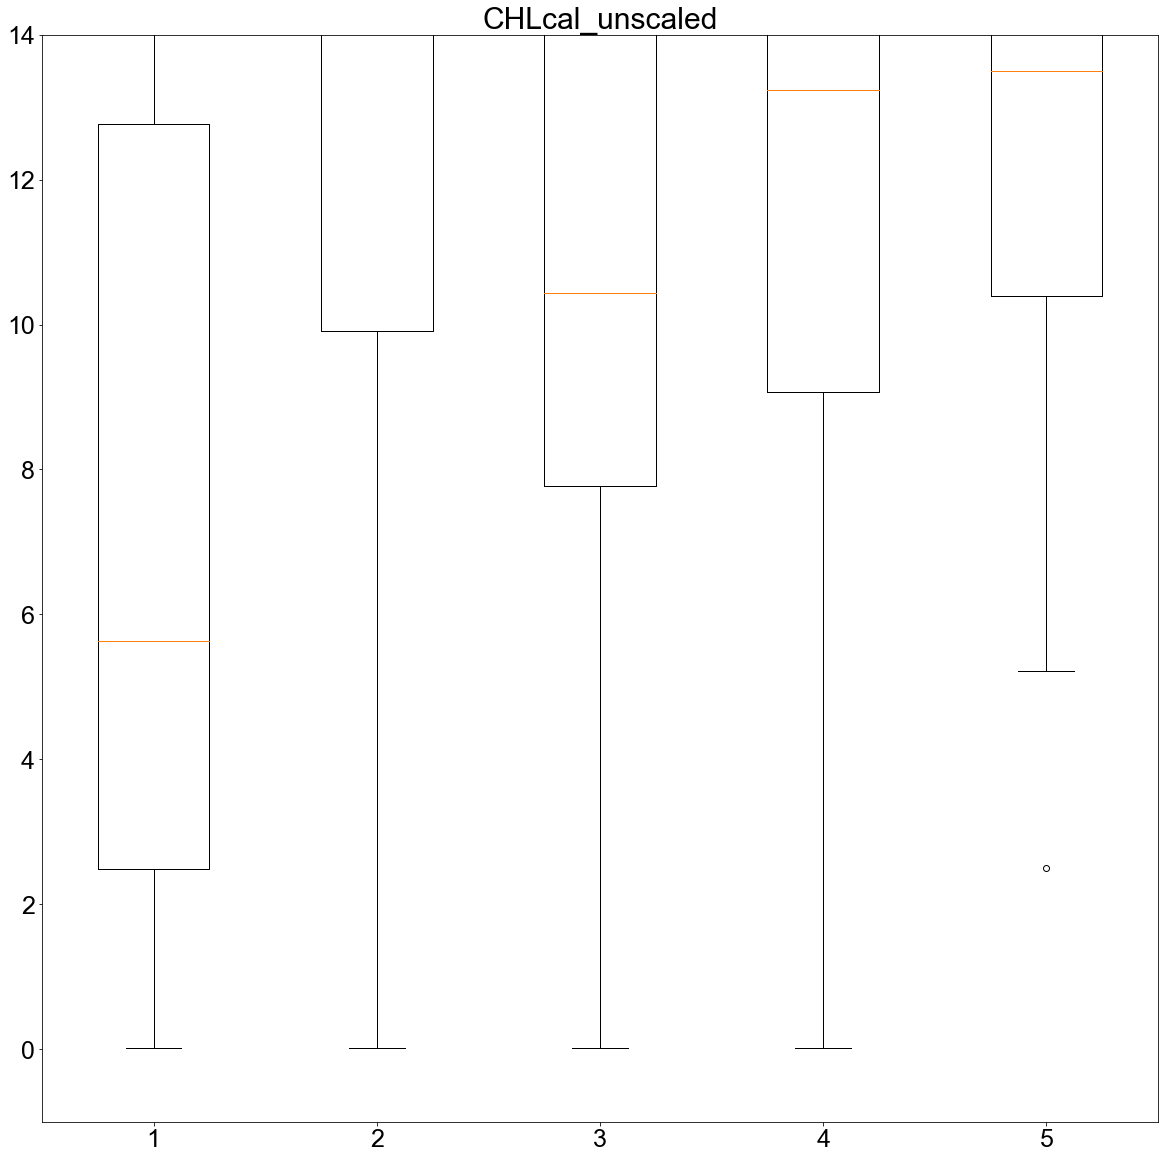

In [9]:
plt.rcParams.update({'font.size': 25})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']= 'white'
plt.rcParams['font.sans-serif'] = "Arial"
 
for variable in unscaled_variables :
      fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20))
      bp1 = ax1.boxplot([state1[variable], state2[variable], state3[variable], state4[variable], state5[variable]],
                         vert = True,
                         labels = ['1', '2', '3', '4', '5'])
      ax1.set_title(variable)
      ax1.set_ylim(-1, 14)
      file = str(variable) + '_boxplot.png'

## Bar graph by stratum and statez

In [10]:
print(stratum_names)

['Backwater area contiguous to the main channel', 'Impounded', 'Isolated', 'Lake Pepin or Swan Lake', 'Main channel', 'Side channel']


In [11]:
crosstab = pd.DataFrame(columns = stratum_names, index = state_names)
print(crosstab)
for stratum in stratum_names:
    for state in state_names:
        crosstab.at[state, stratum] = X[(X['STRATUM'] == stratum) & (X[state] == 1)].shape[0]


        Backwater area contiguous to the main channel Impounded Isolated  \
State 1                                           NaN       NaN      NaN   
State 2                                           NaN       NaN      NaN   
State 3                                           NaN       NaN      NaN   
State 4                                           NaN       NaN      NaN   
State 5                                           NaN       NaN      NaN   

        Lake Pepin or Swan Lake Main channel Side channel  
State 1                     NaN          NaN          NaN  
State 2                     NaN          NaN          NaN  
State 3                     NaN          NaN          NaN  
State 4                     NaN          NaN          NaN  
State 5                     NaN          NaN          NaN  


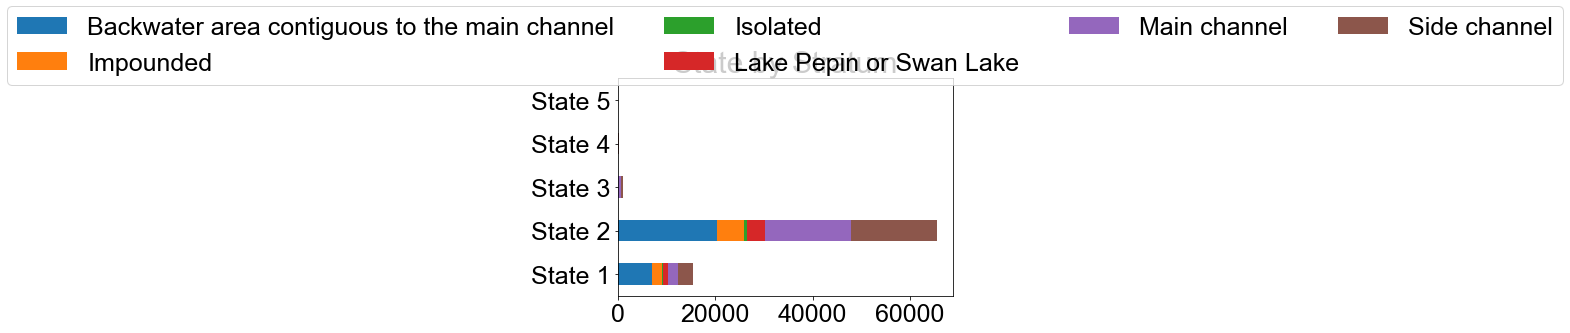

In [12]:
crosstab.plot(kind = 'barh',
    stacked = True,
    title = 'State by Stratum')
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)

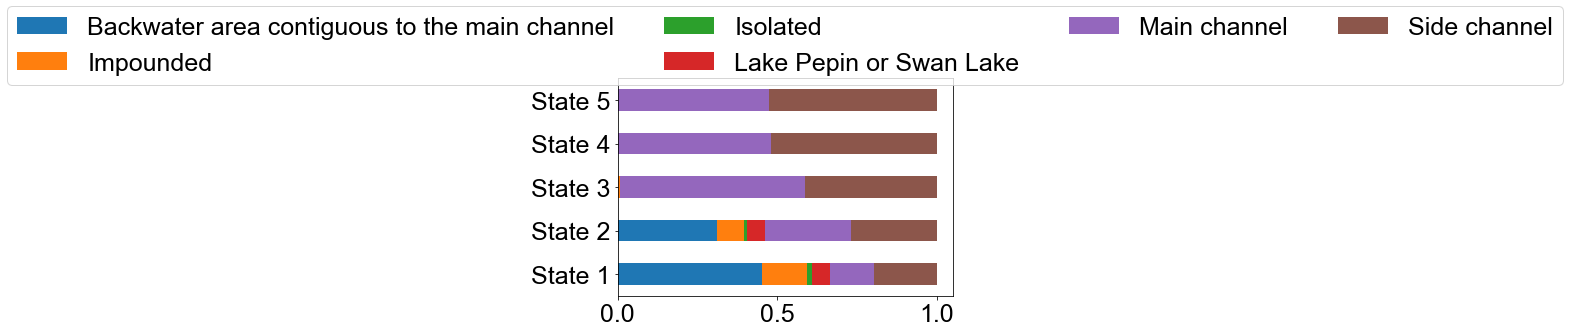

In [13]:
crosstab_norm = crosstab.div( crosstab.sum(axis = 1), axis = 0)
crosstab_norm.plot(kind = 'barh', stacked = True)
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)

<AxesSubplot:title={'center':'State by Stratum'}>

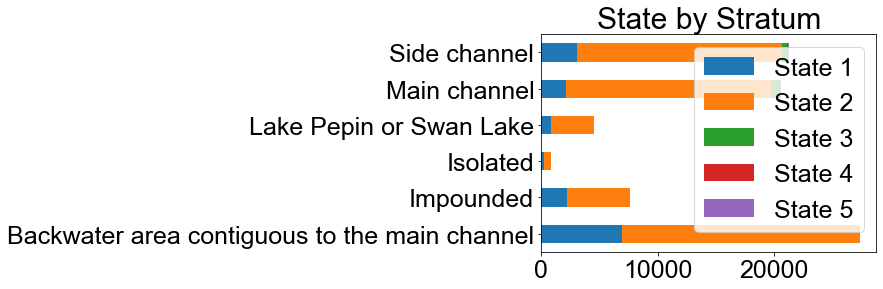

In [14]:
crosstab_2 = pd.DataFrame(columns = state_names, index = stratum_names)
for stratum in stratum_names:
    for state in state_names:
        crosstab_2.at[stratum, state] = X[(X['STRATUM'] == stratum) & (X[state] == 1)].shape[0]

crosstab_2.plot(kind = 'barh',
    stacked = True,
    title = 'State by Stratum')
#plt.legend(loc = "", bbox_to_anchor = (0.5, 1.15), ncol=1)

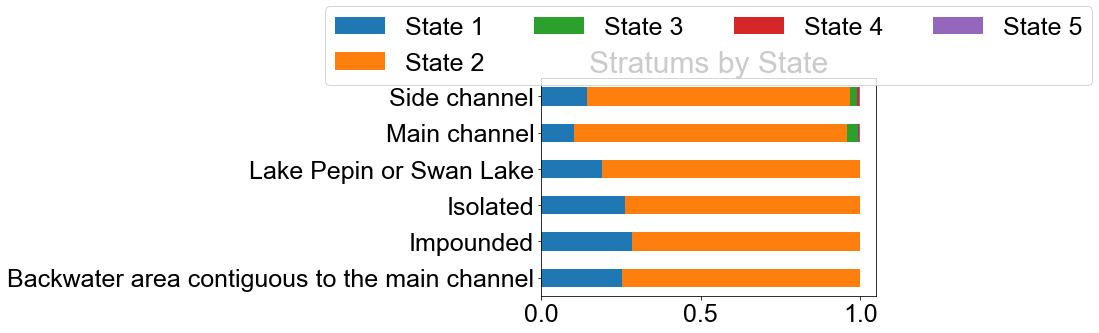

In [15]:
crosstab_norm_2 = crosstab_2.div(crosstab_2.sum(axis = 1), axis = 0)
crosstab_norm_2.plot(kind = 'barh', stacked = True, title = 'Stratums by State')
plt.legend(loc = "center", bbox_to_anchor = (0.5, 1.15), ncol=4)